<a href="https://colab.research.google.com/github/ArpitKRS/Image-recognition/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [4]:
# Loading and spliting the data

(train_images, train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

# Normalise pixel values to be in between 0 and 1
train_images , test_images = train_images / 255.0 , test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

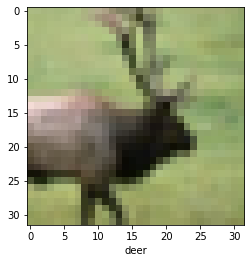

In [6]:
# Let's look at a one image
IMG_INDEX = 34  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

CNN Arch

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.summary()  # let's have a look at our model so far

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Training the model

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4072 - accuracy: 0.4897 - val_loss: 1.1902 - val_accuracy: 0.5757
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1476 - accuracy: 0.5962 - val_loss: 1.0552 - val_accuracy: 0.6271
Epoch 3/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.0057 - accuracy: 0.6458 - val_loss: 0.9968 - val_accuracy: 0.6509
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9184 - accuracy: 0.6777 - val_loss: 0.9329 - val_accuracy: 0.6752
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8588 - accuracy: 0.6994 - val_loss: 0.8944 - val_accuracy: 0.6924
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8079 - accuracy: 0.7150 - val_loss: 0.8953 - val_accuracy: 0.6937
Epoch 7/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7619 - accuracy: 0.7326 - val_loss: 0.8584 -

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 4s - loss: 0.8660 - accuracy: 0.7052 - 4s/epoch - 12ms/step
0.7052000164985657


Data Augmentation (This technique is used when we have less amount of data)

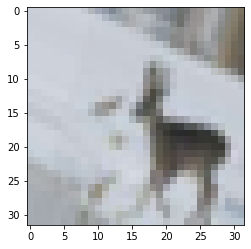

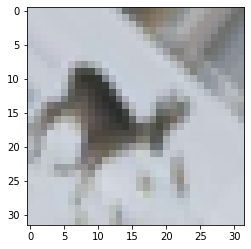

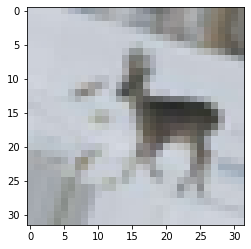

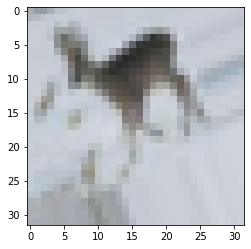

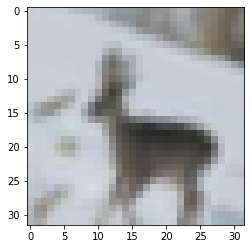

In [14]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator # If you want to learn more about data augmentation then just simply ream documentation of ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()
